In [63]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import data
from skimage.exposure import match_histograms
import cv2

IMGS_PATH = '/Users/gd/PycharmProjects/ph_project/Article_on_pH_recognition-master/image'
imgs = os.listdir('/Users/gd/PycharmProjects/ph_project/Article_on_pH_recognition-master/image')

In [112]:
imgs

['7.2.png',
 '7.5.png',
 '5.7.png',
 '7.7.png',
 '7.5A.jpg',
 '6.0.png',
 '6.3.png',
 'IMG.jpg',
 '6.0A.png',
 '6.5.png',
 '6.9.png',
 '8.0.png']

In [122]:
print(imgs[1],imgs[4])
print(imgs[5],imgs[8])

7.5.png 7.5A.jpg
6.0.png 6.0A.png


In [145]:
#Возьмем 7.5.png и 7.5A.png, будем считать, что 7.5A.png – референтгое изображение, а 7.5.png – изображение, которое требуется преобразовать к референтному.
#Также и с 6.0.png и 6.0A.png


reference_1 = cv2.imread(os.path.join(IMGS_PATH, imgs[4]))
image_1 = cv2.imread(os.path.join(IMGS_PATH, imgs[1]))

reference_2 = cv2.imread(os.path.join(IMGS_PATH, imgs[8]))
image_2 = cv2.imread(os.path.join(IMGS_PATH, imgs[5]))
# Get the dimensions of the target image
target_height_1, target_width_1 = reference_1.shape[:2]
target_height_2, target_width_2 = reference_2.shape[:2]

# Rescale the first image
rescaled_image_1 = cv2.resize(image_1, (target_width_1, target_height_1), interpolation=cv2.INTER_AREA)
rescaled_image_2 = cv2.resize(image_2, (target_width_2, target_height_2), interpolation=cv2.INTER_AREA)

# Convert BGR (OpenCV) to RGB (Matplotlib)
rescaled_image_rgb_1 = cv2.cvtColor(rescaled_image_1, cv2.COLOR_BGR2RGB)
rescaled_image_rgb_2 = cv2.cvtColor(rescaled_image_2, cv2.COLOR_BGR2RGB)

rescaled_image_rgb_1[rescaled_image_rgb_1 == 0] = 255
# reference_1[reference_1 == 0] = 255
reference_1 = cv2.cvtColor(reference_1, cv2.COLOR_BGR2RGB)

rescaled_image_rgb_2[rescaled_image_rgb_2 == 0] = 255
reference_2[reference_2 == 0] = 255
reference_2 = cv2.cvtColor(reference_2, cv2.COLOR_BGR2RGB)


# Display the rescaled image


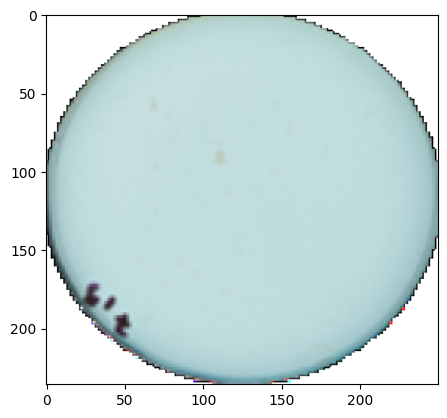

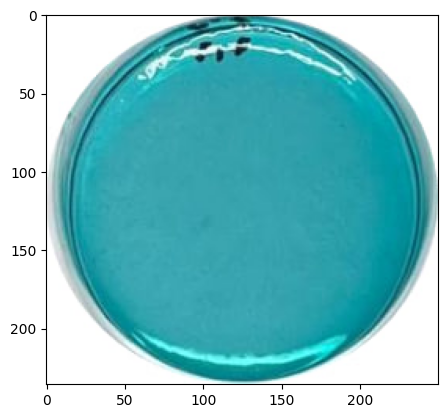

In [146]:
plt.imshow(rescaled_image_rgb_1)
# plt.axis('off')  # Hide axes
plt.show()
plt.imshow(reference_1)
plt.show()

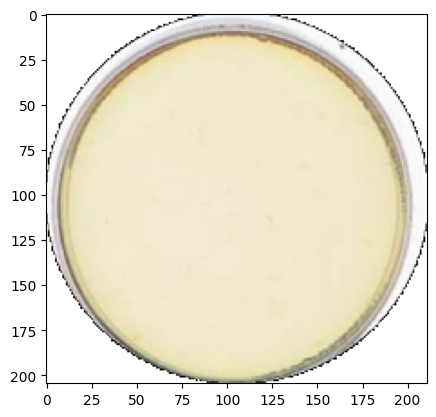

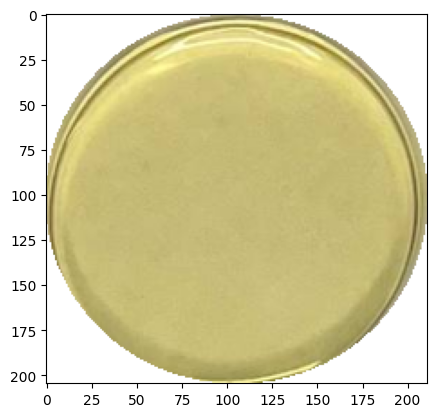

In [147]:
plt.imshow(rescaled_image_rgb_2)
# plt.axis('off')  # Hide axes
plt.show()
plt.imshow(reference_2)
plt.show()

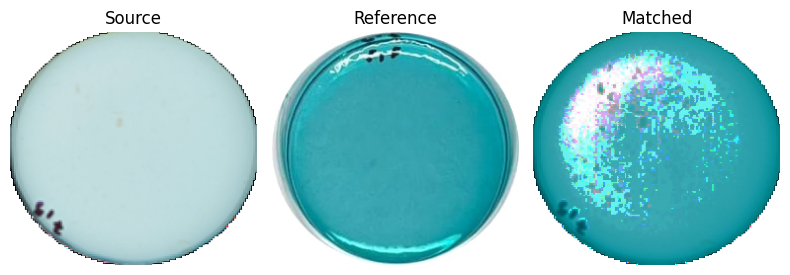

In [148]:
matched_1 = match_histograms(rescaled_image_rgb_1, reference_1, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(rescaled_image_rgb_1)
ax1.set_title('Source')
ax2.imshow(reference_1)
ax2.set_title('Reference')
ax3.imshow(matched_1)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

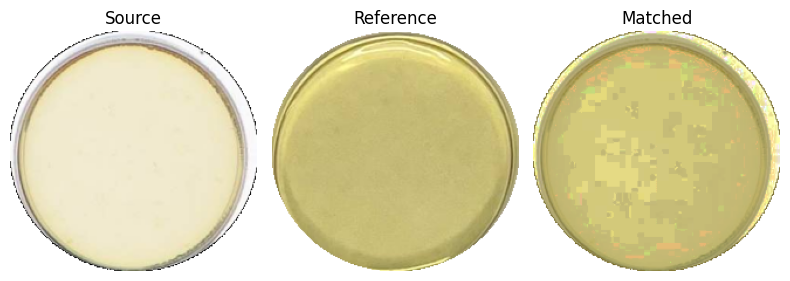

In [149]:
matched_2 = match_histograms(rescaled_image_rgb_2, reference_2, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(rescaled_image_rgb_2)
ax1.set_title('Source')
ax2.imshow(reference_2)
ax2.set_title('Reference')
ax3.imshow(matched_2)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()